# 추천시스템 기초 실습  - Tobigs 15기 이성범

## 0. 데이터 불러오기 및 탐색

데이터는 movielens에서 제공하는 데이터 중 하나로, 가장 크기가 작은 버전으로 가져왔습니다.
- movies.csv: 영화 제목과 영화 장르에 대한 데이터
- ratings.csv: user(사용자)-movie(아이템) 선호도 데이터
- tags.csv: user가 해당 movie에 부여한 tag 데이터

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
paths = '/content/drive/MyDrive/Tobigs/투빅스/10주차/week10_Recommendation_이원도/ml-latest-small/'

links = pd.read_csv(paths + 'links.csv')
movies = pd.read_csv(paths + 'movies.csv')
ratings = pd.read_csv(paths + 'ratings.csv')
tags = pd.read_csv(paths + 'tags.csv')

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## 1. Content-based Filtering 실습

content-based filtering은 movie(아이템) 간의 유사도를 계산하여 해당 movie와 유사한 movie를 추천해주는 간단한 추천 알고리즘

제공된 데이터에서 movie의 콘텐츠를 확인할 수 있는 데이터는 movies.csv의 장르와 tags.csv의 태그 정보가 있음

In [ ]:
# 아이템 간 유사도 계산을 위한 데이터프레임 만들기
# 열은 영화 장르가 될 수도 있고, 영화 태그가 될 수도 있음 (영화 태그의 경우 모든 영화에 대한 태그는 없음)

genres_list = []
for genres in movies['genres'].unique():
  for genre in genres.split('|'):
    if genre in genres_list: pass
    else: genres_list.append(genre)

genres_df = pd.DataFrame(data=np.zeros((movies.shape[0], len(genres_list)), dtype=int) , columns = genres_list)
for idx, genres in enumerate(movies['genres'].values):
  for genre in genres.split('|'):
    genres_df.loc[idx , [genre]] += 1

genres_df.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


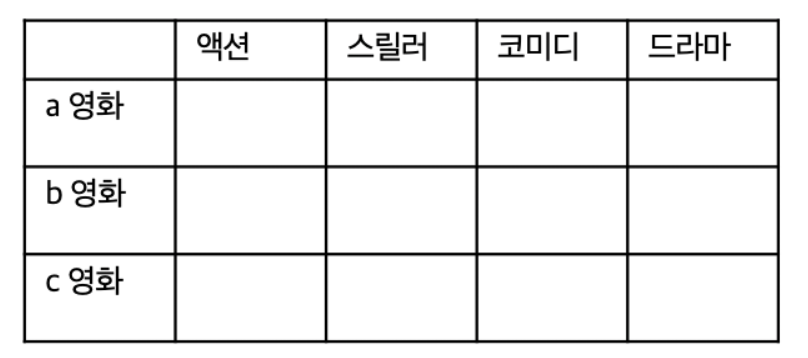

In [ ]:
# 해당 데이터프레임은 사용자-영화 선호도 행렬입니당

piv = pd.concat([movies['movieId'], genres_df], axis=1).set_index('movieId')
piv

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
193583,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TF-IDF를 적용할 수 있지만 여기서는 skip
# TF-IDF를 적용하게 되면 다음과 같이 나오긴 합니당

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
movies['corpus'] = movies['genres'].apply(lambda x : ' '.join(x.split('|')))

In [ ]:
tfidv = TfidfVectorizer().fit(movies['corpus'])

In [ ]:
temp = pd.DataFrame(tfidv.transform(movies['corpus']).toarray(), columns=tfidv.get_feature_names())
temp

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,film,genres,horror,imax,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


위와 같이 사용하게 된다면 단어를 이상하게 분리해주기 때문에 제대로 구현이 될 수 없음

아래는 직접 TF-IDF를 구현하여 구한 방법임

In [ ]:
N = len(genres_df) # 총 문서의 수

TF = genres_df.values # TF

DF = (genres_df >= 1).sum().values # DF

IDF = np.log((N + 1) / (DF + 1)) # IDF

In [ ]:
# TF-IDF를 구하기 위해서는 l2 정규화 과정을 거쳐야 하기 때문에 l2정규화를 진행
# 참고: https://chan-lab.tistory.com/24

from sklearn import preprocessing 
tf_idf_before_l2 = np.multiply(TF, IDF)
tf_idf_before_l2 = tf_idf_before_l2.reshape(1, -1) 
tf_idf_after_l2 = preprocessing.normalize(tf_idf_before_l2, norm='l2')

In [ ]:
TF_IDF_df = pd.concat([movies['movieId'], pd.DataFrame(data=tf_idf_after_l2.reshape(-1, 20) , columns = genres_list)], axis=1).set_index('movieId')
TF_IDF_df

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,0.007133,0.009667,0.009377,0.003328,0.00882,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007133,0.000000,0.009377,0.000000,0.00882,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.003328,0.00000,0.006317,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.003328,0.00000,0.006317,0.002807,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.003328,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.000000,0.009667,0.000000,0.003328,0.00882,0.000000,0.000000,0.005843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.000000,0.009667,0.000000,0.003328,0.00882,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.002807,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


그런데 사실상 영화마다 속한 장르가 있다면 1번씩만 count되기 때문에 TF-IDF를 이용하는 것은 솔직히 큰 의미가 없다고 생각됨

In [ ]:
# 아이템 간 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# 영화-영화의 유사도를 코사인 유사도를 사용해서 구해줍니당
CBF = pd.DataFrame(cosine_similarity(piv, piv))

In [ ]:
# movie - moive 아이템 간 유사도 데이터프레임
CBF.index = piv.index
CBF.columns = piv.index
CBF

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,0.258199,0.316228,0.774597,0.00000,0.258199,0.000000,0.000000,0.447214,0.447214,0.200000,0.258199,0.000000,0.000000,0.000000,0.000000,0.00000,0.316228,0.000000,0.400000,0.000000,0.00000,0.0,0.316228,0.000000,0.632456,0.316228,0.00000,0.000000,0.000000,0.00000,...,0.0,0.316228,0.447214,0.258199,0.258199,0.200000,0.670820,0.258199,0.447214,0.0,0.516398,0.600000,0.000000,0.316228,0.447214,0.774597,0.316228,0.0,0.258199,0.000000,0.000000,0.258199,0.0,0.000000,0.447214,0.00000,0.00000,0.447214,0.0,0.447214,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,0.000000,0.000000,0.666667,0.00000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.408248,0.000000,0.516398,0.000000,0.00000,0.0,0.408248,0.000000,0.408248,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.333333,0.333333,0.258199,0.577350,0.000000,0.577350,0.0,0.333333,0.516398,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.288675,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,0.816497,0.500000,0.000000,0.00000,0.408248,0.000000,0.500000,0.707107,0.707107,0.316228,0.408248,0.000000,0.000000,0.000000,0.500000,0.00000,0.000000,0.500000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.500000,1.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.500000,0.707107,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.0,0.408248,0.316228,0.000000,1.000000,0.707107,0.408248,0.500000,0.0,0.000000,0.000000,0.000000,0.408248,0.0,0.500000,0.707107,0.00000,0.00000,0.000000,0.0,0.353553,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,1.000000,0.408248,0.000000,0.57735,0.333333,0.408248,0.816497,0.577350,0.577350,0.516398,0.333333,0.258199,0.000000,0.408248,0.816497,0.57735,0.408248,0.816497,0.258199,0.408248,0.57735,0.0,0.408248,0.408248,0.408248,0.816497,0.57735,0.408248,0.333333,0.57735,...,0.0,0.408248,0.577350,0.000000,0.000000,0.258199,0.000000,0.333333,0.000000,0.0,0.333333,0.258199,0.408248,0.816497,0.577350,0.333333,0.816497,0.0,0.000000,0.000000,0.000000,0.666667,0.0,0.816497,0.577350,0.57735,0.57735,0.000000,0.0,0.288675,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.577350,0.707107,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.447214,0.577350,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.707107,0.707107,0.00000,0.000000,0.000000,0.00000,...,0.0,0.707107,1.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000,0.0,0.577350,0.447214,0.000000,0.707107,1.000000,0.577350,0.707107,0.0,0.000000,0.000000,0.000000,0.577350,0.0,0.000000,1.000000,0.00000,0.00000,0.000000,0.0,0.500000,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
# 각 영화와 다른 영화와의 유사도가 모두 계산되어 있고, 유사도가 높은 영화가 가장 비슷한 영화라고 할 수 있습니당
# 입력 아이템과 가장 유사한 아이템 TOP10개를 뽑아봅시당
def getCBF(movieId):
  movies.index = movies['movieId']
  df = movies.loc[movieId, :]

  title = df['title']
  genres = df['genres']

  recommend_ldx = CBF[movieId].sort_values(ascending = False)[ :10].index.tolist()
  recommend_df = movies.loc[recommend_ldx, :]

  print(f'입력 영화: {title}')
  print(f'입력 영화 장르: {genres}')
  print()
  print(f'=====Most similar List=====')

  return recommend_df

In [ ]:
getCBF(193583)

입력 영화: No Game No Life: Zero (2017)
입력 영화 장르: Animation|Comedy|Fantasy

=====Most similar List=====


,movieId,title,genres,corpus
movieId,,,,
79008,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy,Animation Comedy Fantasy
126577,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,Animation Comedy Fantasy
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation Comedy Fantasy
72692,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,Animation Comedy Fantasy
4158,4158,Monkeybone (2001),Animation|Comedy|Fantasy,Animation Comedy Fantasy
182297,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy,Animation Comedy Fantasy
6773,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy,Animation Comedy Fantasy
7228,7228,Cool World (1992),Animation|Comedy|Fantasy,Animation Comedy Fantasy
139855,139855,Anomalisa (2015),Animation|Comedy|Fantasy,Animation Comedy Fantasy


## 2. Collaborative Filtering 실습

User-based CF를 실습해 봅시당

In [ ]:
# User-Item 간 선호도 데이터프레임 만들기

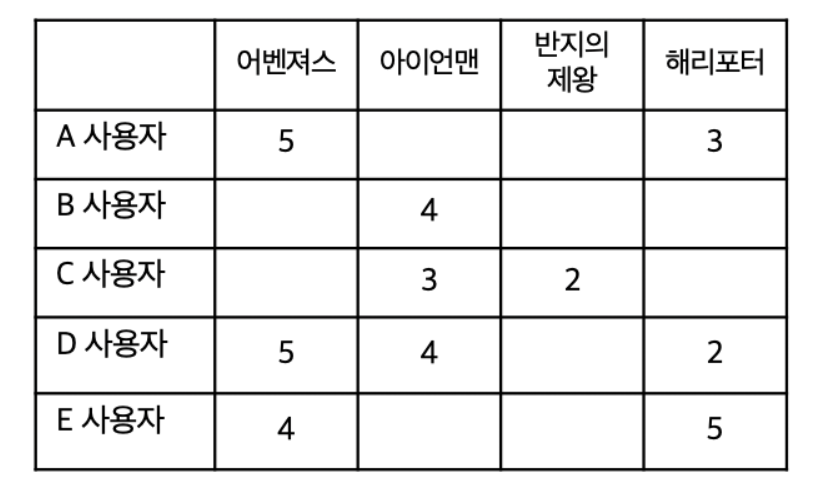

In [ ]:
# 해당 데이터프레임은 사용자-영화 선호도 데이터프레임입니당
piv = ratings.pivot_table('rating', index="userId", columns='movieId')
piv.fillna(0, inplace=True)
piv

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.5,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,4.5,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,2.0,0.0,3.5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.5,3.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 사용자 간 유사도 구하기
CF = pd.DataFrame(cosine_similarity(piv, piv))

In [ ]:
# 사용자와 사용자의 유사도를 구할 때 꼭 코사인 유사도를 사용하지 않아도 됩니당
# 보완 코사인 유사도 혹은 피어슨 상관계수를 적용해보아유
CF.index = piv.index
CF.columns = piv.index
CF

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,0.132499,0.016458,0.092971,0.113238,0.160689,0.169858,0.264358,0.214868,0.325376,0.160969,0.153162,0.050691,0.106669,0.155193,0.099261,0.105791,0.238933,0.202866,0.145251,0.099781,0.164454,0.146211,0.151945,0.083544,0.074508,0.071673,0.144736,0.138588,0.329782,0.094755,...,0.090224,0.131072,0.253480,0.093450,0.062668,0.051803,0.317319,0.000000,0.141129,0.249326,0.057399,0.048914,0.052175,0.100406,0.114076,0.123280,0.122782,0.183922,0.118112,0.324766,0.136809,0.143934,0.174413,0.141960,0.110558,0.123713,0.312843,0.011280,0.282412,0.291272,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,0.044419,0.000000,0.043918,0.016901,0.119778,0.093728,0.103755,0.166253,0.012571,0.014137,0.090880,0.144635,0.013597,0.129902,0.226008,0.000000,0.000000,0.058145,0.104059,0.149324,0.000000,0.017807,0.032428,0.043299,0.000000,0.054012,0.028500,0.023147,0.000000,0.017446,...,0.000000,0.032675,0.167959,0.035531,0.000000,0.000000,0.014870,0.000000,0.000000,0.061953,0.136703,0.219315,0.043620,0.000000,0.127551,0.089562,0.000000,0.055900,0.026429,0.056348,0.036147,0.030684,0.062033,0.013125,0.000000,0.104568,0.011986,0.048508,0.098000,0.023248,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,0.000000,0.000000,0.000000,0.003064,0.017251,0.032299,0.009813,0.028241,0.019142,0.008756,0.004017,0.003070,0.003081,0.002592,0.005100,0.000000,0.002332,0.029771,0.005974,0.000000,0.003507,0.015494,0.007156,0.000736,0.000000,0.000000,0.000000,0.004196,0.003639,0.002530,...,0.020899,0.008056,0.000000,0.000000,0.000000,0.029830,0.039894,0.000000,0.005749,0.033121,0.008561,0.000000,0.000000,0.000000,0.000000,0.000986,0.015793,0.003923,0.004791,0.027418,0.000000,0.000000,0.006460,0.001983,0.000000,0.025873,0.028970,0.000000,0.039539,0.013143,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,0.054767,0.049945,0.076949,0.048989,0.071551,0.164761,0.145058,0.123217,0.206053,0.113755,0.053014,0.043403,0.093971,0.071690,0.032862,0.061832,0.128954,0.135593,0.061308,0.058140,0.126182,0.200597,0.167247,0.045571,0.050148,0.113807,0.061031,0.090125,0.240976,0.053436,...,0.018553,0.182857,0.125627,0.064559,0.061035,0.005932,0.169440,0.000000,0.098777,0.148584,0.043871,0.047619,0.048474,0.041246,0.088289,0.064095,0.138766,0.049146,0.064485,0.219298,0.116111,0.068196,0.217116,0.082614,0.091974,0.107908,0.275436,0.016054,0.201610,0.211921,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,0.183805,0.058860,0.017157,0.221711,0.110152,0.082171,0.162633,0.121313,0.098758,0.096474,0.058264,0.033074,0.066889,0.096215,0.040705,0.294282,0.100491,0.121894,0.068876,0.065534,0.068585,0.233932,0.282323,0.029953,0.311472,0.022065,0.303078,0.377773,0.152956,0.321077,...,0.020016,0.124806,0.129338,0.341347,0.049306,0.000000,0.122199,0.000000,0.182382,0.117199,0.057538,0.000000,0.124645,0.348215,0.029293,0.072713,0.154315,0.377256,0.230961,0.152971,0.000000,0.359595,0.171864,0.137990,0.073238,0.096181,0.116071,0.000000,0.098599,0.137053,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [ ]:
# 입력 사용자와 가장 가까운 유저에서 선호도가 가장 높은 아이템 TOP5를 추천해봅시당!
# 이 때, 입력 사용자가 이미 시청한/평가한 영화는 제외해야하도록 추천 리스트를 만들어봅시당

def get_recomeend(x, recomeend_list):
  if x in recomeend_list: return True
  else: return False

def getCF(userId):
  input_user = ratings[ratings['userId'] == userId]['movieId'].values.tolist()
  
  output_userid = CF[userId].sort_values(ascending = False).index[1]
  output_user = ratings[ratings['userId'] == output_userid]['movieId'].values.tolist()

  recomeend_list = list(set(output_user) - set(input_user))
  recomeend_list = ratings[ratings['userId'] == output_userid][ratings[ratings['userId'] == output_userid]['movieId'].apply(lambda x : get_recomeend(x, recomeend_list))].sort_values(ascending = False, by=['rating'])
  recomeend_list = movies.loc[recomeend_list[:5]['movieId'].values.tolist(), :]

  favorit_list = pd.concat([movies['movieId'], genres_df], axis=1).set_index('movieId')
  favorit_list = favorit_list.loc[input_user, :].sum().sort_values(ascending = False)
  favorit_list = favorit_list[favorit_list > 0]
  plt.title(f"{str(userId)}'s favorit genres")
  favorit_list.plot.bar()

  print(f'=====Recommendation List=====')
  return recomeend_list

=====Recommendation List=====


,movieId,title,genres,corpus
movieId,,,,
318,318,"Shawshank Redemption, The (1994)",Crime|Drama,Crime Drama
246,246,Hoop Dreams (1994),Documentary,Documentary
319,319,Shallow Grave (1994),Comedy|Drama|Thriller,Comedy Drama Thriller
47,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Mystery Thriller
333,333,Tommy Boy (1995),Comedy,Comedy


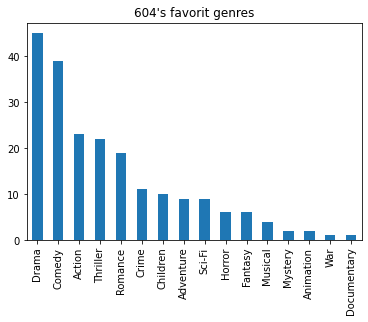

In [ ]:
getCF(604)

## 3. Matrix Factorization 실습

같은 폴더에 있는 MF.py의 MatrixFactorization()을 적용해 봅시당

In [ ]:
import MF

In [ ]:
# 사용자-영화 선호도 데이터프레임입니당
piv.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# MF.py를 참고하여 인자를 입력해 보아유
factorizer = MF.MatrixFactorization(piv.values, k=100, learning_rate = 0.01, reg_param = 0.01, epochs = 300, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0023
Iteration: 20 ; cost = 0.0021
Iteration: 30 ; cost = 0.0019
Iteration: 40 ; cost = 0.0018
Iteration: 50 ; cost = 0.0017
Iteration: 60 ; cost = 0.0016
Iteration: 70 ; cost = 0.0015
Iteration: 80 ; cost = 0.0014
Iteration: 90 ; cost = 0.0013
Iteration: 100 ; cost = 0.0012
Iteration: 110 ; cost = 0.0012
Iteration: 120 ; cost = 0.0011
Iteration: 130 ; cost = 0.0011
Iteration: 140 ; cost = 0.0010
Iteration: 150 ; cost = 0.0010
Iteration: 160 ; cost = 0.0010
Iteration: 170 ; cost = 0.0009
Iteration: 180 ; cost = 0.0009
Iteration: 190 ; cost = 0.0009
Iteration: 200 ; cost = 0.0009
Iteration: 210 ; cost = 0.0008
Iteration: 220 ; cost = 0.0008
Iteration: 230 ; cost = 0.0008
Iteration: 240 ; cost = 0.0008
Iteration: 250 ; cost = 0.0008
Iteration: 260 ; cost = 0.0007
Iteration: 270 ; cost = 0.0007
Iteration: 280 ; cost = 0.0007
Iteration: 290 ; cost = 0.0007
Iteration: 300 ; cost = 0.0007
User Latent P:
[[-0.29455855  0.28402273 -0.11708433 ...  0.01806644  0.3301961

In [ ]:
# Matrix Factorizaion으로 찾아낸 잠재요인을 기반으로 재생산한 행렬이네유
pd.DataFrame(R_reduced)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.382193,3.824706,4.044897,4.058608,3.840287,3.991829,3.507616,2.533629,4.041620,3.680935,4.542229,3.139433,0.316441,4.646180,1.890985,5.151076,5.232852,3.066167,3.864929,2.431881,3.890122,4.510143,3.282862,2.333819,4.544474,4.589076,3.081592,4.897957,4.596541,5.251953,3.502141,4.157698,4.781434,4.867793,4.264919,4.472157,3.147295,4.480746,2.091731,2.071736,...,8.131969,2.332898,3.741109,1.803307,1.611940,3.030136,4.240570,3.945177,1.279712,3.489536,2.892081,3.111965,1.508263,6.707833,2.831195,8.186826,0.753981,2.244413,3.372899,5.944596,3.198072,4.767361,5.759803,2.380823,2.931529,4.130860,2.653062,4.463673,4.446554,1.163083,2.544392,4.709360,5.658039,2.237087,6.487456,1.618304,6.458672,2.907262,3.215583,4.615405
1,3.524892,3.353554,2.903953,3.258010,4.757865,3.953010,3.509012,1.632125,3.198394,3.307754,2.950249,4.600356,9.254465,5.116693,0.312143,5.659664,3.769669,4.943517,4.222530,3.074944,3.417109,4.096339,3.242793,3.727000,3.676682,2.255560,3.822572,4.536731,4.181263,5.477348,3.671452,4.865649,3.900819,2.748951,3.523417,4.106521,5.070279,4.261280,4.024055,0.407810,...,9.634202,-5.228867,2.775371,2.873947,3.716231,10.766966,4.076107,6.334979,3.203085,-2.757055,7.236267,2.884100,3.024254,5.784917,12.029195,5.627223,0.258554,1.479534,7.077863,-2.751633,2.298091,3.410080,-2.830212,2.009933,2.933636,0.738091,3.439132,2.148433,4.445327,4.968273,0.554415,5.517389,5.471373,2.311937,2.682961,4.580483,2.306584,6.069390,2.999397,2.233609
2,2.839872,2.141087,4.184944,3.845707,3.250898,2.408420,1.309171,3.494318,3.731009,4.032934,2.413633,1.511596,3.171413,4.135499,-1.383177,3.461880,2.315365,0.782971,1.722618,5.938616,2.048197,2.669588,2.486701,1.619850,2.841725,1.977358,3.428147,2.420020,4.322518,5.250419,0.564783,3.314716,0.417081,2.659366,3.943243,4.273728,5.559096,1.687780,4.118339,7.925341,...,-0.016063,0.426339,5.642672,-1.027569,5.663222,-0.924492,5.174228,4.796696,-0.733512,-4.222186,1.682383,0.507241,3.047045,2.188157,4.528152,2.086165,11.215578,3.881672,5.308536,3.903186,6.494787,-0.478721,3.636711,3.838425,3.898116,-0.389827,7.313028,-1.611821,0.399815,1.708599,4.295286,5.097345,1.494743,1.825669,3.388110,2.391436,2.784365,6.311859,-6.640535,3.300220
3,4.118739,3.065075,3.359078,1.351059,2.100557,2.008429,4.062530,3.125448,1.991452,2.837840,4.098644,2.694837,3.303256,3.471847,2.831771,2.317780,3.234039,4.503255,2.177060,2.879070,3.114309,3.053880,-0.253094,1.674150,3.078353,5.006542,1.479664,3.945023,2.257906,-2.170052,2.819586,2.153980,3.765012,3.144445,3.427705,3.287152,1.656375,4.976218,1.972570,6.988617,...,3.326544,-2.031441,-1.233343,-0.436662,1.965809,0.965250,4.892809,2.610229,-0.314851,6.163587,7.580944,-2.141790,7.171218,4.514749,-0.337493,2.567416,5.950941,1.533996,-2.529250,9.660233,5.726250,2.901811,3.993934,-0.947565,3.966296,1.686676,-1.012860,2.547223,-0.525574,7.782472,5.846970,3.647007,2.685686,3.327788,6.412862,2.241515,1.365610,3.314493,-3.077142,0.469675
4,3.962497,3.094446,1.219556,2.143485,0.966965,3.426316,3.116831,-1.196062,4.386253,2.645702,2.528485,2.602203,4.644847,3.497388,3.069072,4.056245,4.168974,4.917170,2.645364,3.421944,3.988131,2.601801,4.805571,3.458619,3.416877,4.672727,4.720625,3.367517,5.797111,-0.299397,4.470798,4.322501,3.994836,3.971233,0.538687,2.951687,-1.957010,2.384323,1.885470,3.512762,...,4.033652,4.033712,1.559329,7.053179,3.113855,1.750348,-1.334206,4.556123,2.558876,3.499702,-3.426340,-0.245826,2.429413,4.829819,-1.794634,7.388999,1.383186,6.128446,5.969471,3.118524,1.212148,2.299121,4.604397,4.985895,5.270783,0.095516,5.212117,3.277272,3.137410,-1.201065,5.698304,0.524296,1.639396,2.984834,1.238366,-0.359395,4.534219,4.009842,5.959526,-0.733930
...,...,...,...

## 4. 본인만의 추천 리스트 만들어보기

배운 내용 혹은 알고 있는 추천 알고리즘을 사용해서 user의 다음 추천 아이템에 대한 TOP10 추천 리스트를 만들어 봅시당

코드를 이해할 수 있도록 주석을 꼼꼼하게 달아주시면 감사하겠습니다!


위 장르기반 추천시스템의 경우 장르 유사도만을 기준으로 상위 10개에 장르가 유사한 영화를 추천해줬다. 하지만 이러한 추천의 경우 장르에 대한 사람들의 평점을 반영하지 않기 때문에 제대로된 추천을 해주지 못한다고 생각한다.

따라서 나는 장르 유사도와 평점을 합하여 유사한 장르 중에서 평점이 높은 영화를 추천해주는 추천시스템을 만들 예정이다. 

그런데 이러한 추천시스템을 만들 때 문제점이 존재한다. 예를 들어 1명이 투표한 평점 5점짜리 영화와 100명이 투표한 평점 4점짜리 영화 사이에 평점의 중요도가 다를 것이다. 따라서 이러한 투표한 인원 수 대비 평점의 중요도를 나타내고자 IMDb의 weighted rating 평가 방법을 사용할 예정이다.

## IMDb의 weighted rating 평가 방법
(v / (v + m)) * R + (m / (v + m)) * C

R = 개별 영화 평점

v = 개별 영화에 평점을 투표한 횟수

m = 상위 10%에 들어야하는 최소 투표 수

C = 전체 영화에 대한 평균 평점


## 수행순서

1. movies와 ratings에 존재하는 영화의 개수가 달라서 새로운 DataFrame을 만듬
2. 만들어진 DataFrame은 영화 전체 투표수, 영화에 대한 평균 평점, movieId, title, genres 를 col로 가짐
3. IMDb의 weighted rating 평가 방법을 사용한 Scroe 값을 나타내는 col을 새롭게 만듬
4. 장르에 대한 유사도를 구함
5. 장르 유사도를 기반으로 Score 점수의 상위 top10의 영화를 추천해줌

In [ ]:
self_df = pd.DataFrame()
self_df['movieId'] = ratings.groupby(['movieId'])[['rating']].mean().index
self_df['mean_rating'] = ratings.groupby(['movieId'])[['rating']].mean().values
self_df['vote_count'] = ratings.groupby(['movieId'])[['userId']].count().values
self_df.index = self_df['movieId']
self_df['title'] = movies.loc[self_df.index, 'title'].values
self_df['genres'] = movies.loc[self_df.index, 'genres'].values
self_df = self_df.reset_index(drop = True)[['movieId', 'title', 'genres', 'mean_rating', 'vote_count']]

In [ ]:
# IMDb의 weighted rating 평가 방법

m = self_df['vote_count'].quantile(0.90)
C = self_df['mean_rating'].mean()

def Weighted_rating(data, m = m, C = C):
  v = data["vote_count"]
  R = data["mean_rating"]

  return (v / (v + m)) * R + (m / (v + m)) * C

self_df["Score"] = self_df.apply(lambda x : Weighted_rating(x, m, C), axis = 1)
self_df.head()

,movieId,title,genres,mean_rating,vote_count,Score
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215,3.847463
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110,3.398439
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52,3.260584
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7,3.076062
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49,3.139291


In [ ]:
genres_list = []
for genres in self_df['genres'].unique():
  for genre in genres.split('|'):
    if genre in genres_list: pass
    else: genres_list.append(genre)

genres_df = pd.DataFrame(data=np.zeros((self_df.shape[0], len(genres_list)), dtype=int) , columns = genres_list)
for idx, genres in enumerate(self_df['genres'].values):
  for genre in genres.split('|'):
    genres_df.loc[idx , [genre]] += 1

piv = pd.concat([self_df['movieId'], genres_df], axis=1).set_index('movieId')
piv.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 아이템 간 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

CBF = pd.DataFrame(cosine_similarity(piv, piv))
CBF.index = piv.index
CBF.columns = piv.index
CBF.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.0,0.316228,0.632456,0.0,0.258199,0.258199,0.316228,0.774597,0.00000,0.258199,0.000000,0.000000,0.447214,0.447214,0.200000,0.258199,0.000000,0.0,0.000000,0.000000,0.00000,0.316228,0.000000,0.400000,0.000000,0.00000,0.0,0.316228,0.000000,0.632456,0.316228,0.00000,0.000000,0.000000,0.00000,...,0.0,0.316228,0.447214,0.258199,0.258199,0.200000,0.67082,0.258199,0.447214,0.0,0.516398,0.600000,0.000000,0.316228,0.447214,0.774597,0.316228,0.0,0.258199,0.0,0.0,0.258199,0.0,0.000000,0.447214,0.00000,0.00000,0.447214,0.0,0.447214,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,0.000000,0.000000,0.666667,0.00000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.408248,0.000000,0.516398,0.000000,0.00000,0.0,0.408248,0.000000,0.408248,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.333333,0.333333,0.258199,0.57735,0.000000,0.577350,0.0,0.333333,0.516398,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.288675,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.0,1.000000,0.000000,0.0,0.000000,0.816497,0.500000,0.000000,0.00000,0.408248,0.000000,0.500000,0.707107,0.707107,0.316228,0.408248,0.000000,0.0,0.000000,0.500000,0.00000,0.000000,0.500000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.500000,1.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.500000,0.707107,0.000000,0.000000,0.000000,0.00000,0.408248,0.000000,0.0,0.408248,0.316228,0.000000,1.000000,0.707107,0.408248,0.500000,0.0,0.000000,0.0,0.0,0.408248,0.0,0.500000,0.707107,0.00000,0.00000,0.000000,0.0,0.353553,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.0,0.816497,0.000000,0.0,0.000000,1.000000,0.408248,0.000000,0.57735,0.333333,0.408248,0.816497,0.577350,0.577350,0.516398,0.333333,0.258199,0.0,0.408248,0.816497,0.57735,0.408248,0.816497,0.258199,0.408248,0.57735,0.0,0.408248,0.408248,0.408248,0.816497,0.57735,0.408248,0.333333,0.57735,...,0.0,0.408248,0.577350,0.000000,0.000000,0.258199,0.00000,0.333333,0.000000,0.0,0.333333,0.258199,0.408248,0.816497,0.577350,0.333333,0.816497,0.0,0.000000,0.0,0.0,0.666667,0.0,0.816497,0.577350,0.57735,0.57735,0.000000,0.0,0.288675,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.0,0.707107,0.000000,0.0,0.000000,0.577350,0.707107,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.447214,0.577350,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.707107,0.707107,0.00000,0.000000,0.000000,0.00000,...,0.0,0.707107,1.000000,0.000000,0.000000,0.000000,0.00000,0.577350,0.000000,0.0,0.577350,0.447214,0.000000,0.707107,1.000000,0.577350,0.707107,0.0,0.000000,0.0,0.0,0.577350,0.0,0.000000,1.000000,0.00000,0.00000,0.000000,0.0,0.500000,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000


In [ ]:
def getIMDb(movieId):

  self_df.index = self_df["movieId"]

  target_movie = self_df[self_df["movieId"] == movieId]

  target_movie_idx = target_movie.index.values

  sim_index = CBF[movieId].sort_values(ascending = False)[ :30].index.values

  sim_index = sim_index[sim_index != target_movie_idx]

  title = target_movie['title'].values[0]
  genres = target_movie['genres'].values[0]

  recommend_df = self_df.loc[sim_index, :]

  print(f'입력 영화: {title}')
  print(f'입력 영화 장르: {genres}')
  print()
  print(f'=====Most similar List=====')

  return recommend_df.sort_values(ascending = False, by = 'Score')[:10]

In [ ]:
getIMDb(193583)

입력 영화: No Game No Life: Zero (2017)
입력 영화 장르: Animation|Comedy|Fantasy

=====Most similar List=====


,movieId,title,genres,mean_rating,vote_count,Score
movieId,,,,,,
62336,62336,FLCL (2000),Animation|Comedy|Fantasy|Sci-Fi,4.277778,9,3.516281
6773,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy,3.704545,22,3.460941
79008,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy,4.000000,8,3.431032
72356,72356,Partly Cloudy (2009),Animation|Children|Comedy|Fantasy,4.375000,4,3.406003
1151,1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy,5.000000,2,3.382279
52435,52435,How the Grinch Stole Christmas! (1966),Animation|Comedy|Fantasy|Musical,3.590909,11,3.357529
148881,148881,World of Tomorrow (2015),Animation|Comedy,4.500000,2,3.347797
32456,32456,"Pom Poko (a.k.a. Raccoon War, The) (Heisei tan...",Animation|Comedy|Drama|Fantasy,4.250000,2,3.330555
95311,95311,Presto (2008),Animation|Children|Comedy|Fantasy,5.000000,1,3.324504


기존 장르기반 추천보다 장르의 평점을 반영하여 조금 더 정밀하게 추천이 된다는 것을 알 수 있다.

## 참고자료

- https://www.quora.com/How-does-IMDbs-rating-system-work
- https://lsjsj92.tistory.com/565?category=853217